<a href="https://colab.research.google.com/github/Shrishti18/Deep-Learning/blob/main/flower_dataaugmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import matplotlib.pyplot as plt
import numpy as np
import cv2

import PIL
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import models
from tensorflow.keras.models import Sequential

In [5]:
import pathlib
dataset_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"
data_dir = tf.keras.utils.get_file('flower_photos', origin=dataset_url, untar=True)
data_dir = pathlib.Path(data_dir)

In [6]:
image_count = len(list(data_dir.glob('*/*.jpg')))
print(image_count)

3670


In [7]:
list(data_dir.glob('*/*.jpg'))[:5]


[PosixPath('/root/.keras/datasets/flower_photos/roses/5234278003_d827fcd73b_m.jpg'),
 PosixPath('/root/.keras/datasets/flower_photos/roses/4765063233_f64440c20b.jpg'),
 PosixPath('/root/.keras/datasets/flower_photos/roses/3560426426_1c66cb8330.jpg'),
 PosixPath('/root/.keras/datasets/flower_photos/roses/180613732_3a7aba0b80_n.jpg'),
 PosixPath('/root/.keras/datasets/flower_photos/roses/16772483324_09f24813a1_n.jpg')]

In [8]:
roses=list(data_dir.glob('roses/*'))
roses[:5]

[PosixPath('/root/.keras/datasets/flower_photos/roses/5234278003_d827fcd73b_m.jpg'),
 PosixPath('/root/.keras/datasets/flower_photos/roses/4765063233_f64440c20b.jpg'),
 PosixPath('/root/.keras/datasets/flower_photos/roses/3560426426_1c66cb8330.jpg'),
 PosixPath('/root/.keras/datasets/flower_photos/roses/180613732_3a7aba0b80_n.jpg'),
 PosixPath('/root/.keras/datasets/flower_photos/roses/16772483324_09f24813a1_n.jpg')]

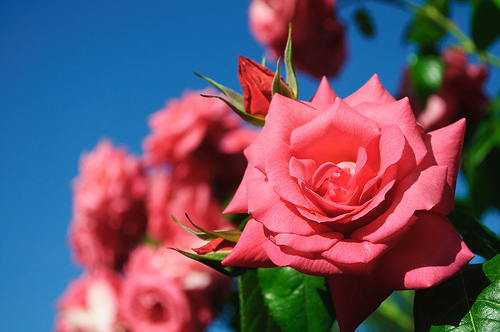

In [6]:
PIL.Image.open(str(roses[1]))

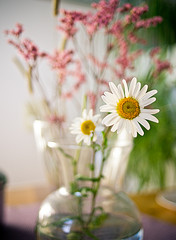

In [7]:
daisy=list(data_dir.glob('daisy/*'))
PIL.Image.open(str(daisy[0]))

now making valid dataset
reading images into numpy array

In [8]:
flowers_images = {
    'roses': list(data_dir.glob('roses/*')),
    'daisy': list(data_dir.glob('daisy/*')),
    'dandelion': list(data_dir.glob('dandelion/*')),
    'sunflowers': list(data_dir.glob('sunflowers/*')),
    'tulips': list(data_dir.glob('tulips/*')),
}

In [9]:
flowers_label={
    'roses': 0,
    'daisy': 1,
    'dandelion': 2,
    'sunflowers': 3,
    'tulips': 4,
}

In [10]:
img = cv2.imread(str(flowers_images['roses'][0]))


In [11]:
img.shape


(240, 240, 3)

In [12]:
cv2.resize(img,(180,180)).shape


(180, 180, 3)

In [13]:
X, y = [], []
for name, image in flowers_images.items():
    for i in image:
        img = cv2.imread(str(i))
        resized_img = cv2.resize(img,(180,180))
        X.append(resized_img)
        y.append(flowers_label[name])

In [14]:
X = np.array(X)
y = np.array(y)


spliting the data 

In [15]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [16]:
X_train_scaled = X_train / 255
X_test_scaled = X_test / 255

In [17]:
model = models.Sequential()
model.add(layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu')),
model.add(layers.MaxPooling2D((2, 2))),
    
model.add(layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu')),
model.add(layers.MaxPooling2D((2, 2))),
    
model.add(layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu')),
model.add(layers.MaxPooling2D((2, 2))),
    
model.add(layers.Flatten()),
model.add(layers.Dense(64, activation='relu')),
model.add(layers.Dense(10, activation='relu')),
model.add(layers.Dense(5, activation='softmax'))

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
model.fit(X_train_scaled, y_train, epochs=5)


Epoch 1/5


/usr/local/lib/python3.7/dist-packages/tensorflow/python/util/dispatch.py:1082: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


86/86 [==============================] - 91s 1s/step - loss: 1.3290 - accuracy: 0.4266
Epoch 2/5
86/86 [==============================] - 97s 1s/step - loss: 1.1078 - accuracy: 0.5265
Epoch 3/5
86/86 [==============================] - 94s 1s/step - loss: 0.9471 - accuracy: 0.6097
Epoch 4/5
86/86 [==============================] - 86s 1s/step - loss: 0.8177 - accuracy: 0.6824
Epoch 5/5
86/86 [==============================] - 87s 1s/step - loss: 0.6696 - accuracy: 0.7453


In [18]:
model.evaluate(X_test_scaled,y_test)

29/29 [==============================] - 8s 266ms/step - loss: 0.9144 - accuracy: 0.6383


[0.9144296646118164, 0.6383442282676697]

In [19]:
img_height=180
img_width=180

In [20]:
data_augmentation = keras.Sequential(
  [
    layers.experimental.preprocessing.RandomFlip("horizontal", 
                                                 input_shape=(img_height, 
                                                              img_width,
                                                              3)),
    layers.experimental.preprocessing.RandomRotation(0.1),
    layers.experimental.preprocessing.RandomZoom(0.1),
  ]
)

In [4]:
plt.imshow(X[0])

NameError: ignored

In [1]:
plt.imshow(data_augmentation(X)[0])


NameError: ignored

In [ ]:
model = models.Sequential([
    data_augmentation,
    layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='relu'),
    layers.Dense(5,activation='softmax')
])

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
model.fit(X_train_scaled, y_train, epochs=5)